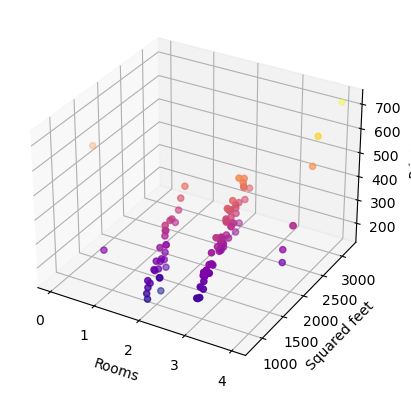

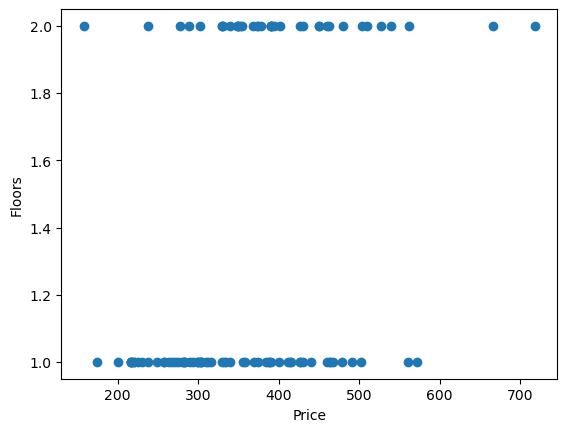

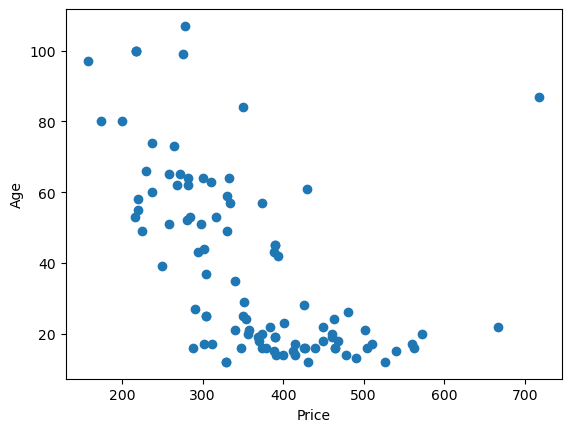

X_norm =  [[ 1.72846725  1.73006889  1.73200764  1.73163968  1.7320191   1.73198021
   1.72753969  1.73199834  1.73078224  1.73150791  1.7239021   1.73192912
   1.73196334  1.73192633  1.73195523  1.72942818  1.73177269  1.73193498
   1.73199094  1.73075504  1.7319423   1.73130369  1.73198487  1.73193422
   1.72767547  1.73124589  1.73011332  1.72928945  1.73201732  1.72516845
   1.73194526  1.73058383  1.73203199  1.72923961  1.73202919  1.73190317
   1.73198037  1.73136853  1.73197381  1.72592736  1.73188978  1.73171522
   1.72932632  1.72516845  1.73198666  1.73201361  1.73199898  1.73199166
   1.72818128  1.73189493  1.73200461  1.73096674  1.73197859  1.73164156
   1.73193501  1.73196721  1.7318837   1.73036099  1.73196788  1.72950381
   1.73192909  1.72987508  1.73036933  1.73166516  1.7304736   1.73183723
   1.73003897  1.72516845  1.73200903  1.73079299  1.73195239  1.73153135
   1.73198624  1.73166516  1.73189748  1.73051042  1.73202132  1.73197554
   1.73018974  1.72650503  1

ValueError: shapes (4,100) and (4,) not aligned: 100 (dim 1) != 4 (dim 0)

In [1]:
from multi_linear_reg import gradient_descent
from multi_linear_reg import compute_gradient
from multi_linear_reg import compute_cost
from multi_linear_reg import zscore_normalize_features

from public_tests import test_data
from public_tests import compute_cost_test
from public_tests import compute_gradient_test
from public_tests import sklearn_linearmodel

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Ej 1
#3D graph Price-Rooms-Squared feet
houses = pd.read_csv('data/houses.txt', header = None)
houses.columns = ["Squared feet", "Rooms", "Floors", "Age", "Price"]
#display(houses)

graph = plt.axes(projection="3d")
#graph.view_init(10, 150)

x = houses["Rooms"]
y = houses["Squared feet"]
z = houses["Price"]

graph.set_xlabel("Rooms")
graph.set_ylabel("Squared feet")
graph.set_zlabel("Price")

graph.scatter(x, y, z, c=z, cmap="plasma")
plt.show()

#2D graph Price-Floors
x = houses["Price"]
y = houses["Floors"]

plt.scatter(x, y)

plt.xlabel('Price')
plt.ylabel('Floors')
plt.show()

#2D graph Price-Age
x = houses["Price"]
y = houses["Age"]

plt.scatter(x, y)

plt.xlabel('Price')
plt.ylabel('Age')
plt.show()

#Ej 2
x = np.array([houses["Squared feet"], houses["Rooms"], houses["Age"], houses["Floors"]])
X_norm, mu, sigma = zscore_normalize_features(x)

print("X_norm = ", X_norm, "\tmu = ", mu, "\tsigma", sigma)

#Ej 3
compute_cost_test(compute_cost)

#Ej 4
compute_gradient_test(compute_gradient)

#Ej 5
alpha = 0.01
iterations = 1500

x = np.array([houses["Squared feet"], houses["Rooms"], houses["Age"], houses["Floors"]])
y = houses["Price"]

w, b, J_history = gradient_descent(x, y, np.zeros(4), 0, compute_cost, compute_gradient, alpha, iterations)
display(w)
display(b)

x = np.array([houses["Squared feet"], houses["Rooms"], houses["Age"], houses["Floors"]])
y = houses["Price"]
w, b = sklearn_linearmodel(x, y)
display(w)
display(b)